<a href="https://colab.research.google.com/github/lykos007/SalesAnalysisProject/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

excel_file_path = '1688639662_ausapparalsales4thqrt2020.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)



In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [4]:
# Check for missing values
missing_values = df.isna()

# Identify rows with at least one NaN value
rows_with_nan = df[missing_values.any(axis=1)]

# Display rows with NaN values
print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [5]:
# Assuming 'Date' is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate mean sales
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg({'Sales': 'mean'})

# Print or display the result
print(monthly_sales)

                Sales
Date                 
2020-10  45353.174603
2020-11  35985.119048
2020-12  53702.380952


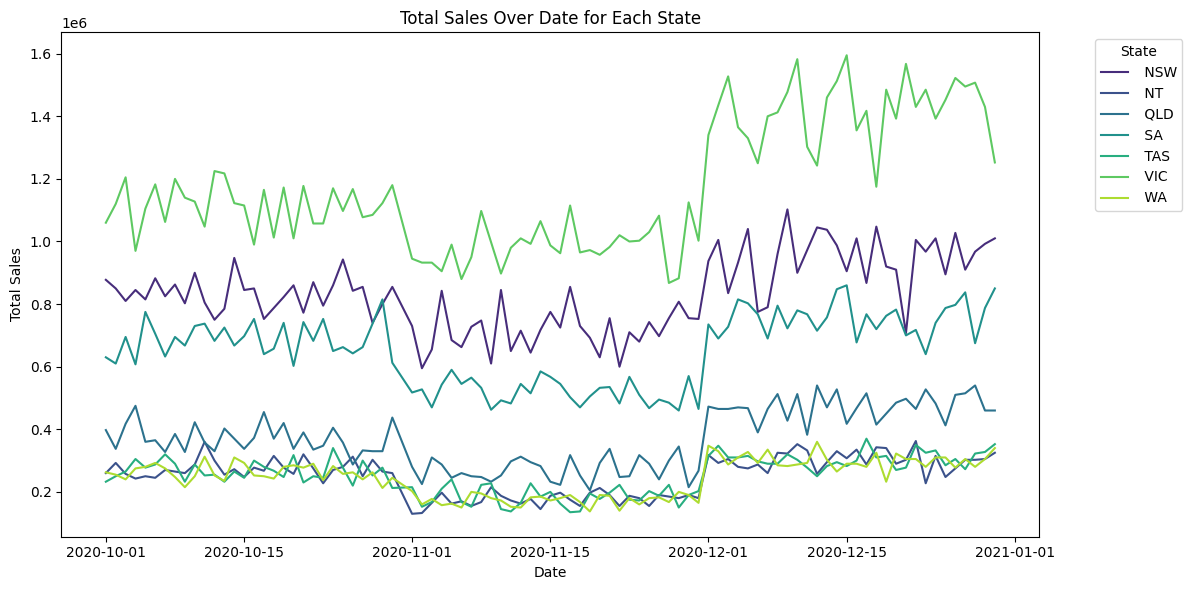

In [6]:
grouped_by_state_date = df.groupby(['State', 'Date'])['Sales'].sum().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='State', data=grouped_by_state_date, palette='viridis')
plt.title('Total Sales Over Date for Each State')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

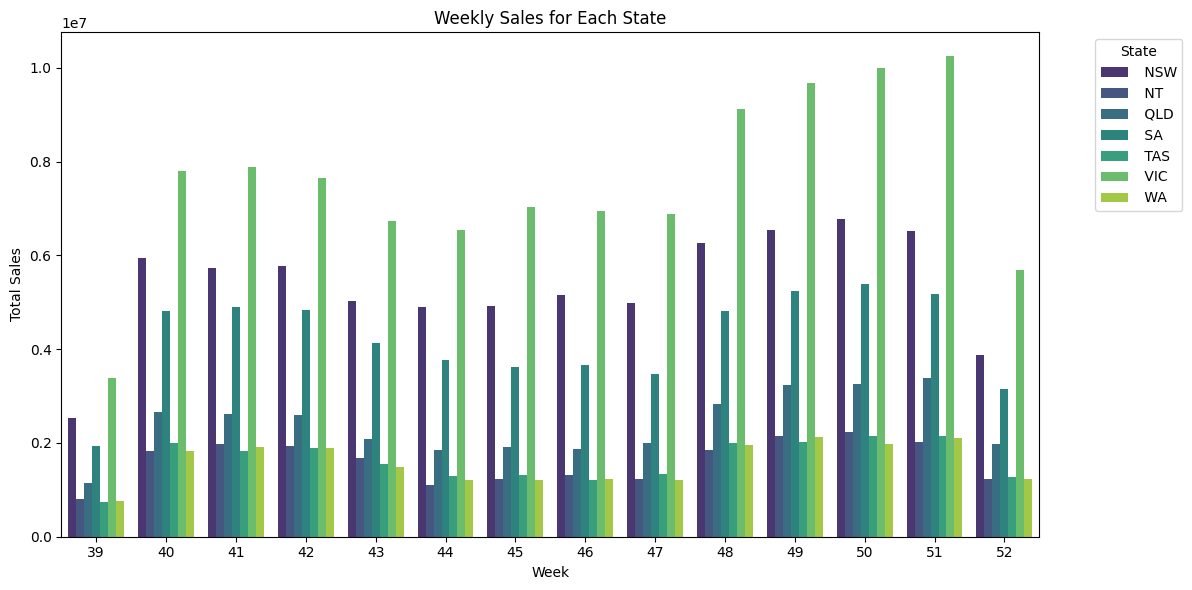

In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the week information from the 'Date' column
df['Week'] = df['Date'].dt.strftime('%U')

# Group by State, Week, and calculate total sales
grouped_by_state_week = df.groupby(['State', 'Week'])['Sales'].sum().reset_index()

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='Week', y='Sales', hue='State', data=grouped_by_state_week, palette='viridis')
plt.title('Weekly Sales for Each State')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

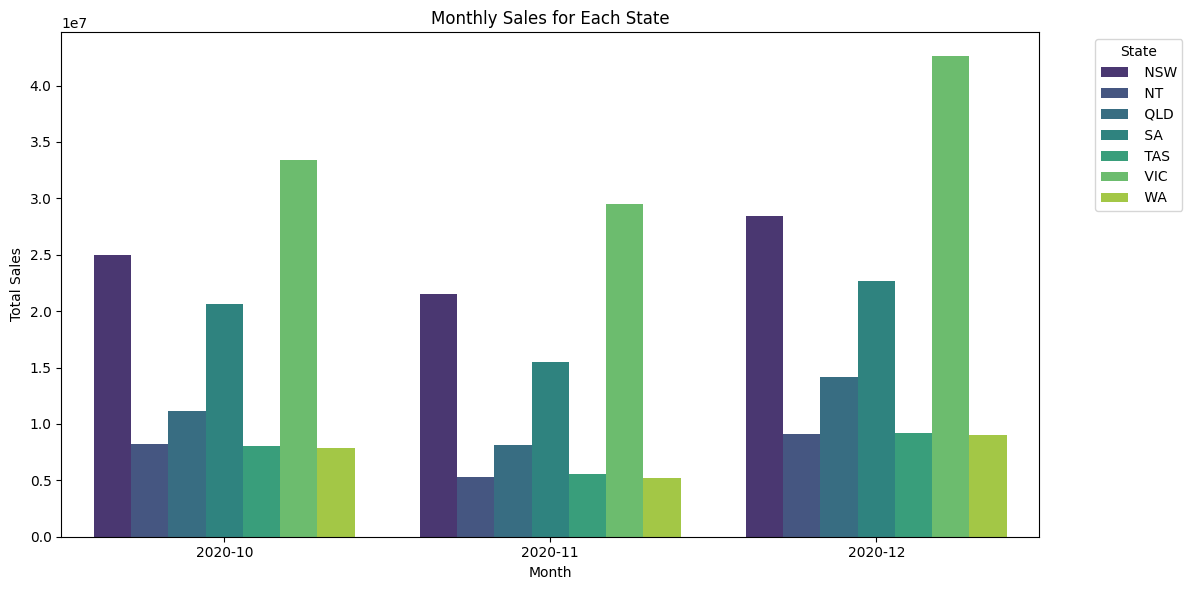

In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month and year information from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Group by State, Month, and calculate total sales
grouped_by_state_month = df.groupby(['State', 'Month'])['Sales'].sum().reset_index()

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sales', hue='State', data=grouped_by_state_month, palette='viridis')
plt.title('Monthly Sales for Each State')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

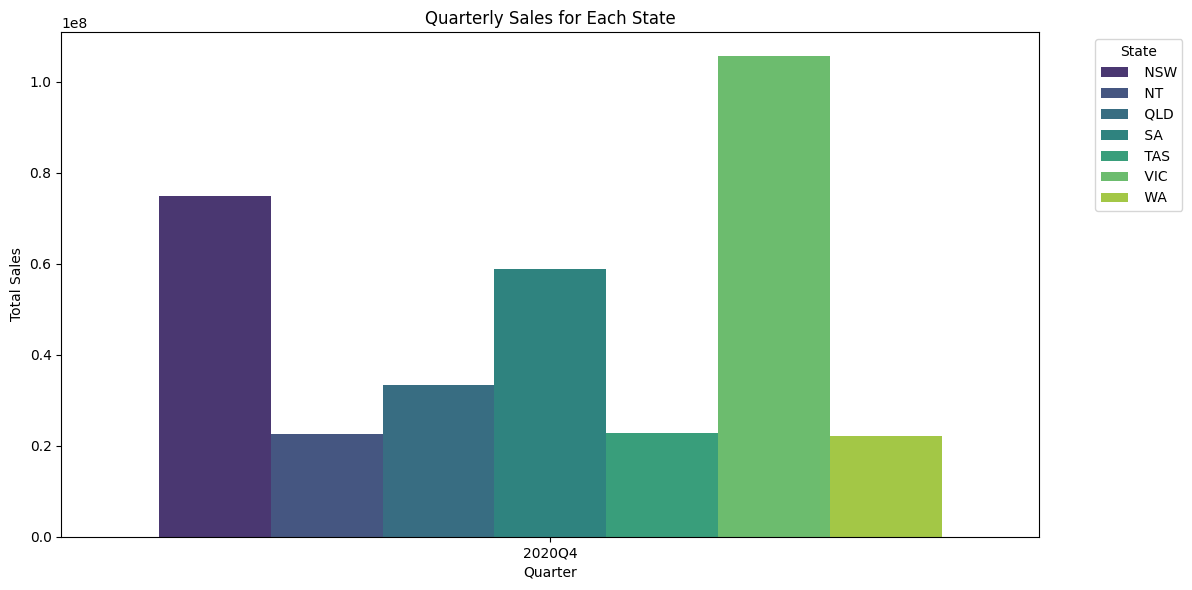

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the quarter and year information from the 'Date' column
df['Quarter'] = df['Date'].dt.to_period('Q')

# Group by State, Quarter, and calculate total sales
grouped_by_state_quarter = df.groupby(['State', 'Quarter'])['Sales'].sum().reset_index()

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='Quarter', y='Sales', hue='State', data=grouped_by_state_quarter, palette='viridis')
plt.title('Quarterly Sales for Each State')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

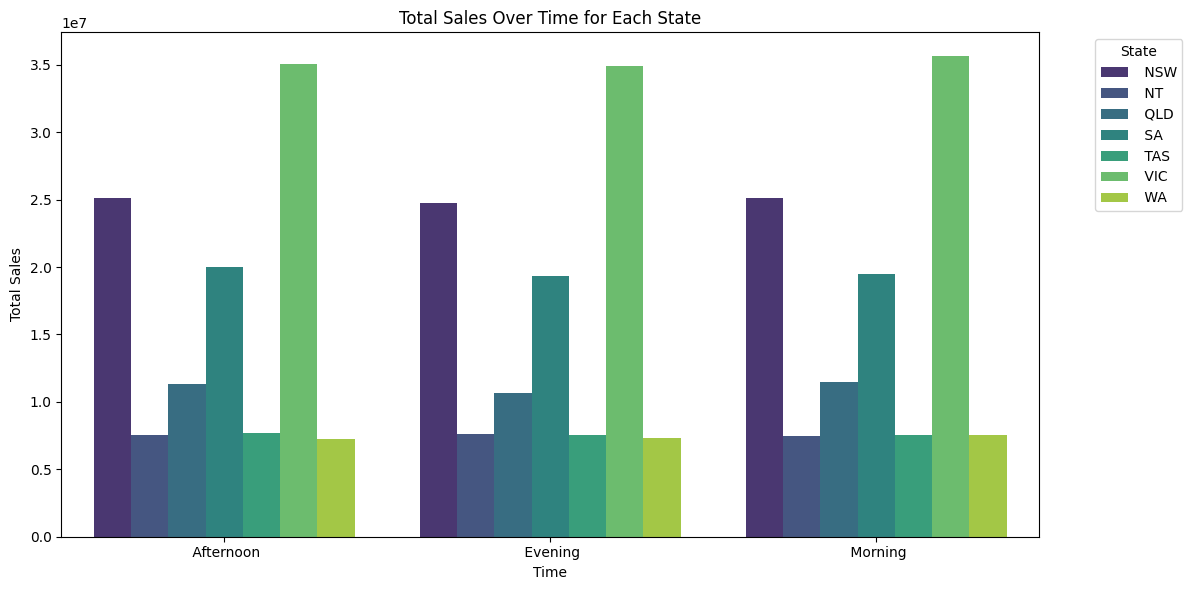

In [9]:
# Group the DataFrame by 'State' and 'Time' and calculate total sales for each group
grouped_by_state_time = df.groupby(['State', 'Time'])['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Sales', hue='State', data=grouped_by_state_time, palette='viridis')
plt.title('Total Sales Over Time for Each State')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

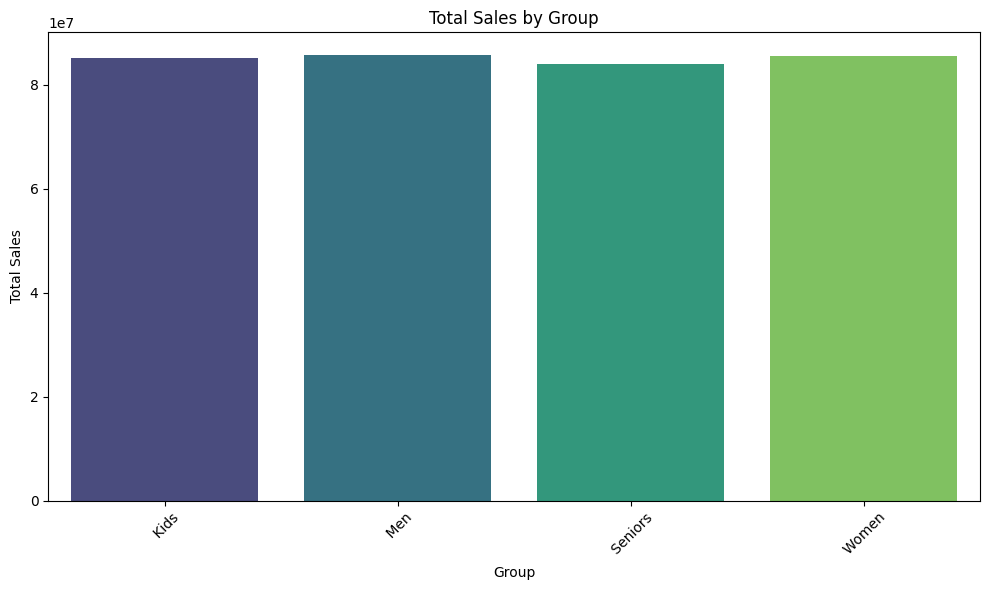

In [10]:
grouped_by_group = df.groupby('Group')['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', data=grouped_by_group, palette='viridis')
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

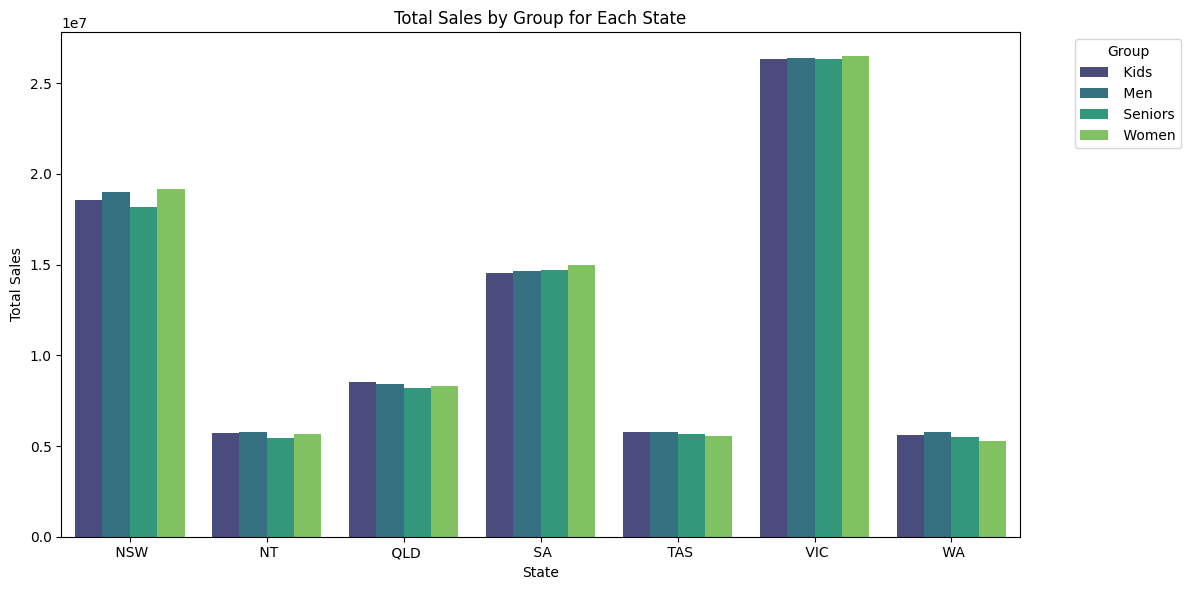

In [11]:
# Group the DataFrame by 'State', 'Group', and calculate total sales for each group
grouped_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=grouped_by_state_group, palette='viridis')
plt.title('Total Sales by Group for Each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-12-c24fde30236b>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


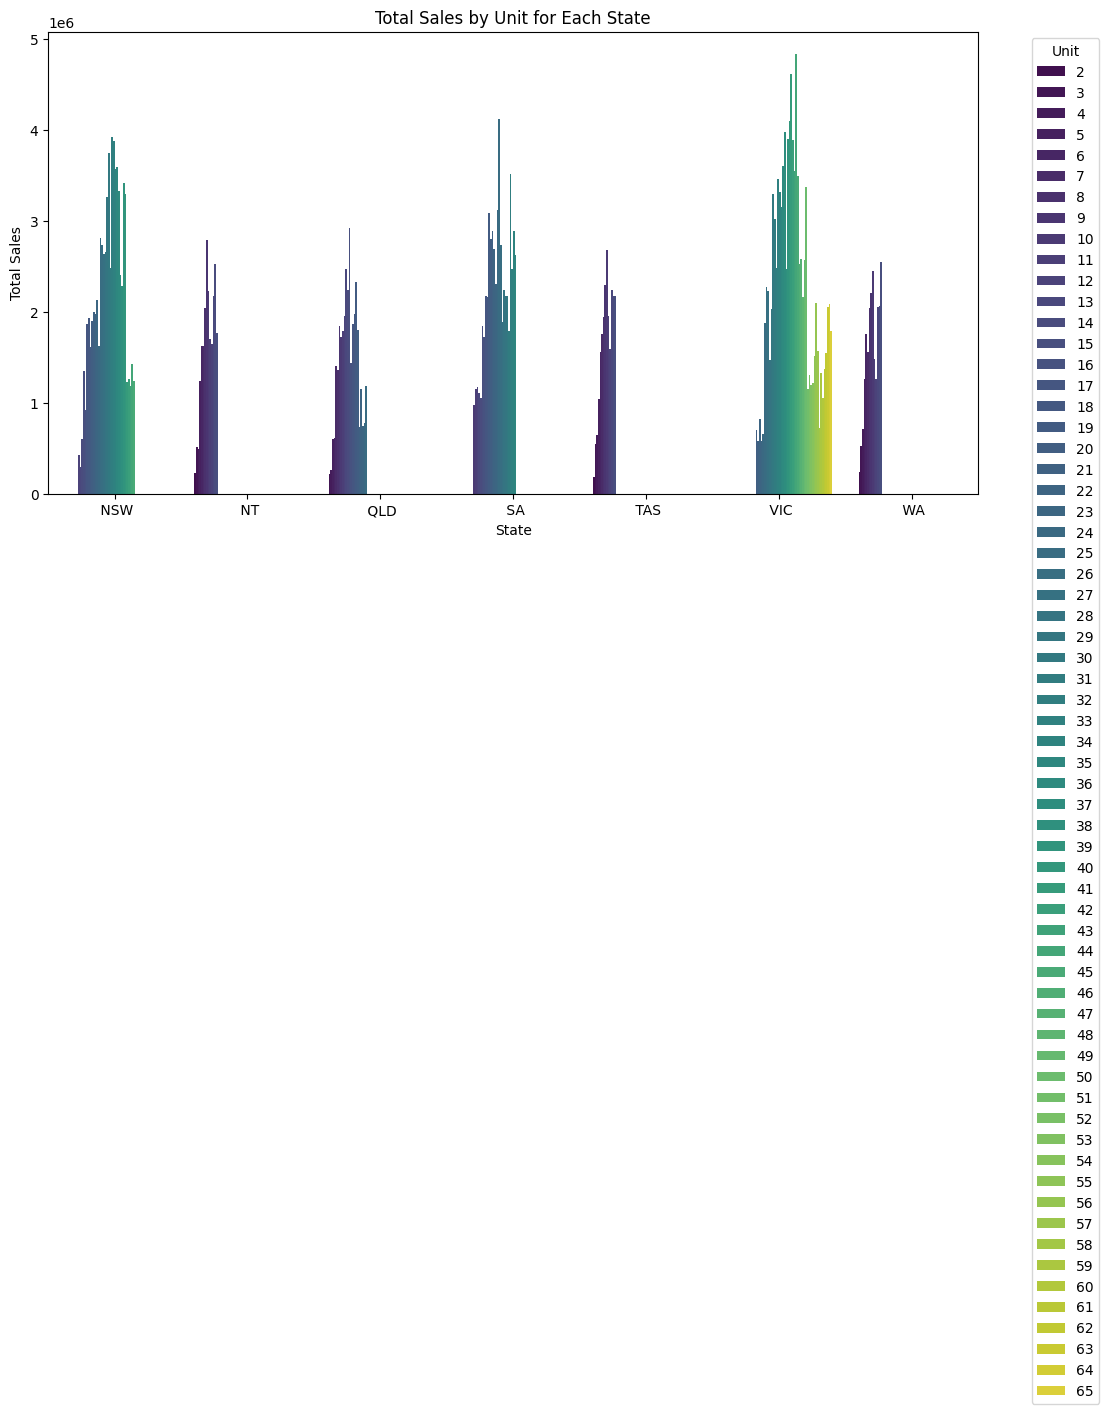

In [12]:
grouped_by_state_unit = df.groupby(['State', 'Unit'])['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Unit', data=grouped_by_state_unit, palette='viridis')
plt.title('Total Sales by Unit for Each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Unit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-14-37fb7a49d447>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


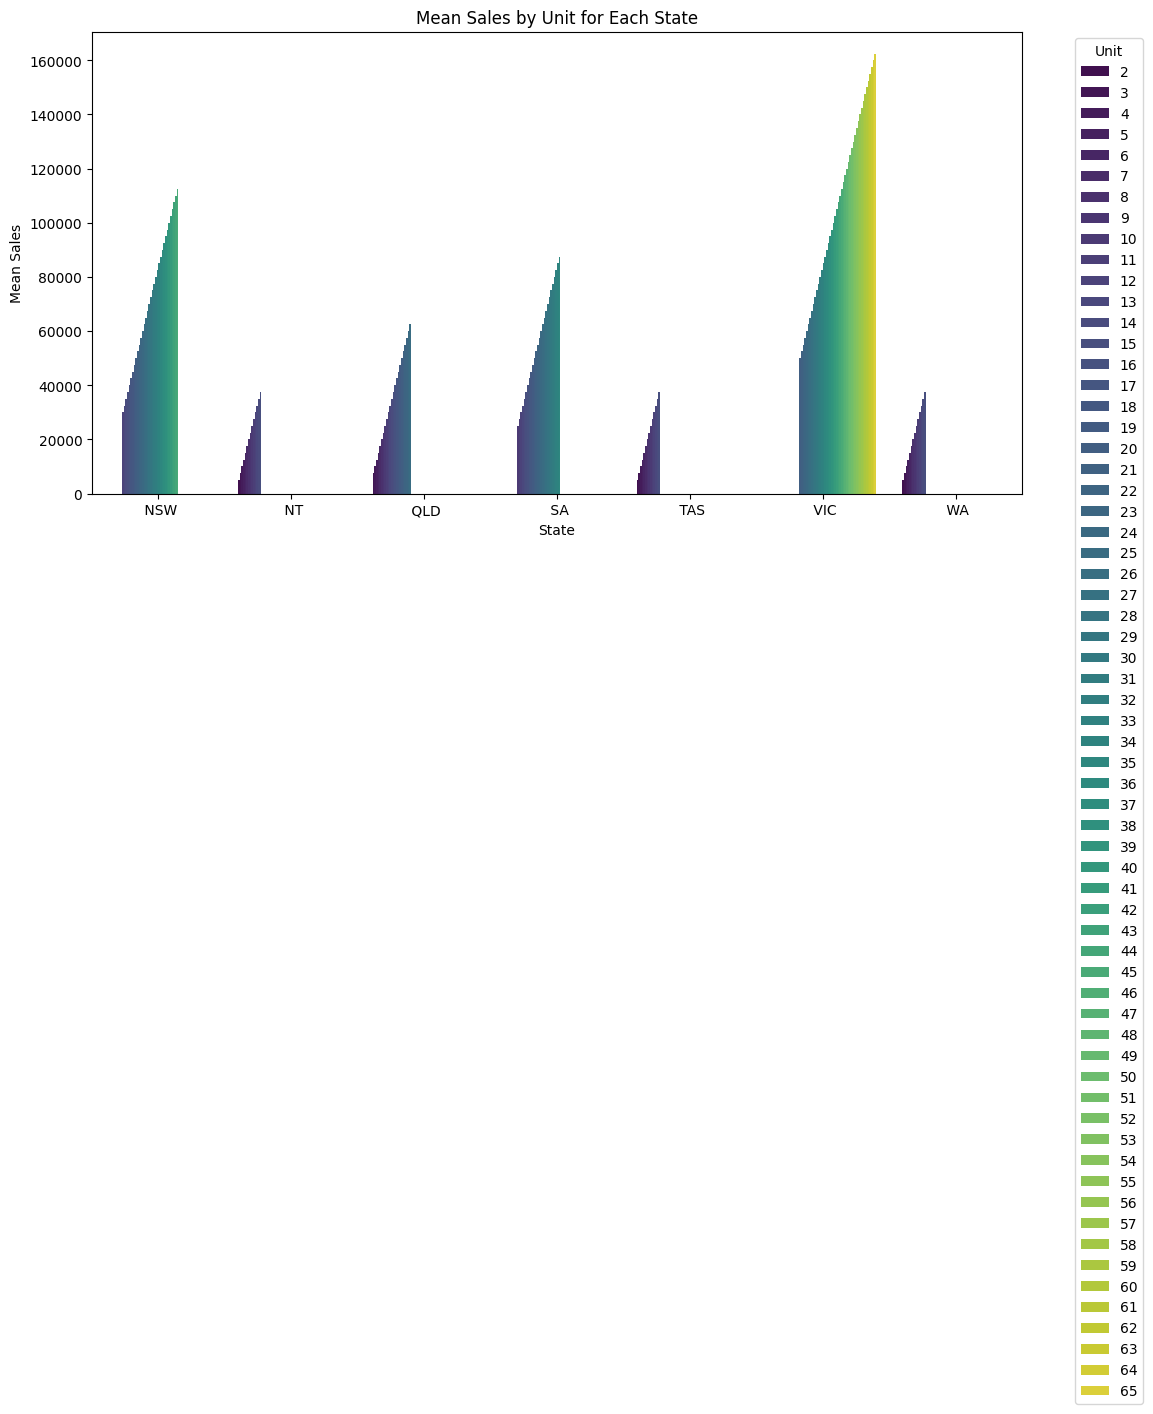

In [14]:
# Assuming 'Date' is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'State' and 'Unit' and calculate the mean of 'Sales'
grouped_by_state_unit_mean = df.groupby(['State', 'Unit'])['Sales'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Unit', data=grouped_by_state_unit_mean, palette='viridis')
plt.title('Mean Sales by Unit for Each State')
plt.xlabel('State')
plt.ylabel('Mean Sales')
plt.legend(title='Unit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# Example: EDA using groupby()
print(df.groupby('State')['Sales'].mean())
print(df.groupby('State')['Sales'].median())


State
 NSW    69416.666667
 NT     20907.407407
 QLD    30942.129630
 SA     54497.685185
 TAS    21074.074074
 VIC    97745.370370
 WA     20511.574074
Name: Sales, dtype: float64
State
 NSW    70000.0
 NT     20000.0
 QLD    30000.0
 SA     52500.0
 TAS    20000.0
 VIC    95000.0
 WA     20000.0
Name: Sales, dtype: float64


In [16]:
# Assuming 'Date' is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by week and calculate mean sales
weekly_sales = df.groupby(df['Date'].dt.to_period("W")).agg({'Sales': 'mean'})

# Print or display the result
print(weekly_sales)

                              Sales
Date                               
2020-09-28/2020-10-04  44776.785714
2020-10-05/2020-10-11  45922.619048
2020-10-12/2020-10-18  45306.122449
2020-10-19/2020-10-25  45603.741497
2020-10-26/2020-11-01  43268.849206
2020-11-02/2020-11-08  35484.693878
2020-11-09/2020-11-15  36007.653061
2020-11-16/2020-11-22  35905.612245
2020-11-23/2020-11-29  36526.360544
2020-11-30/2020-12-06  50378.401361
2020-12-07/2020-12-13  53613.945578
2020-12-14/2020-12-20  53835.034014
2020-12-21/2020-12-27  54030.612245
2020-12-28/2021-01-03  54732.142857


<ipython-input-17-e578c8c7efd5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Unit', y='Sales', data=df, estimator='sum', ci=None)


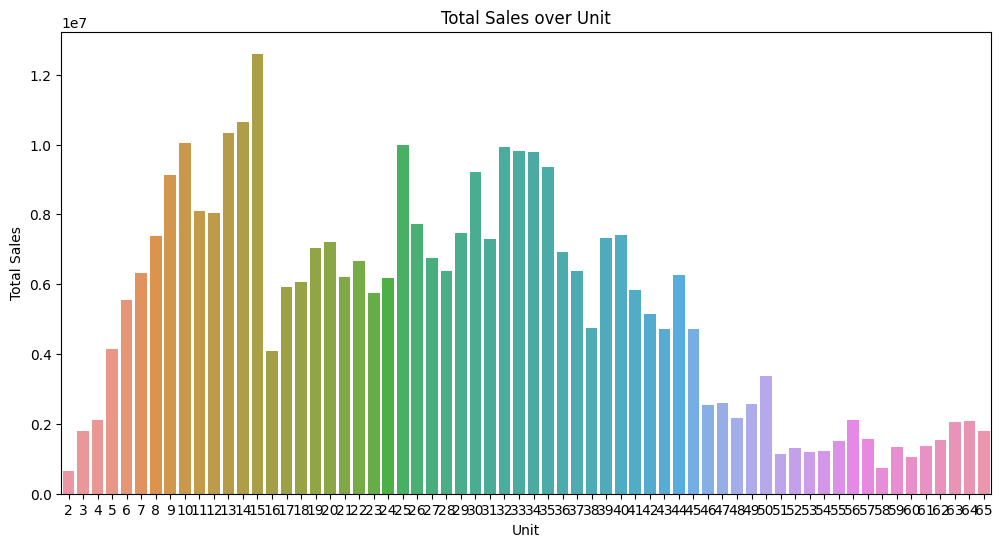

In [17]:
# Plotting using seaborn with total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Unit', y='Sales', data=df, estimator='sum', ci=None)

# Setting labels and title
plt.xlabel('Unit')
plt.ylabel('Total Sales')
plt.title('Total Sales over Unit')

# Display the plot
plt.show()

<ipython-input-18-62b5637dde27>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Unit', y='Sales', data=unit_state_var, ci='sd')


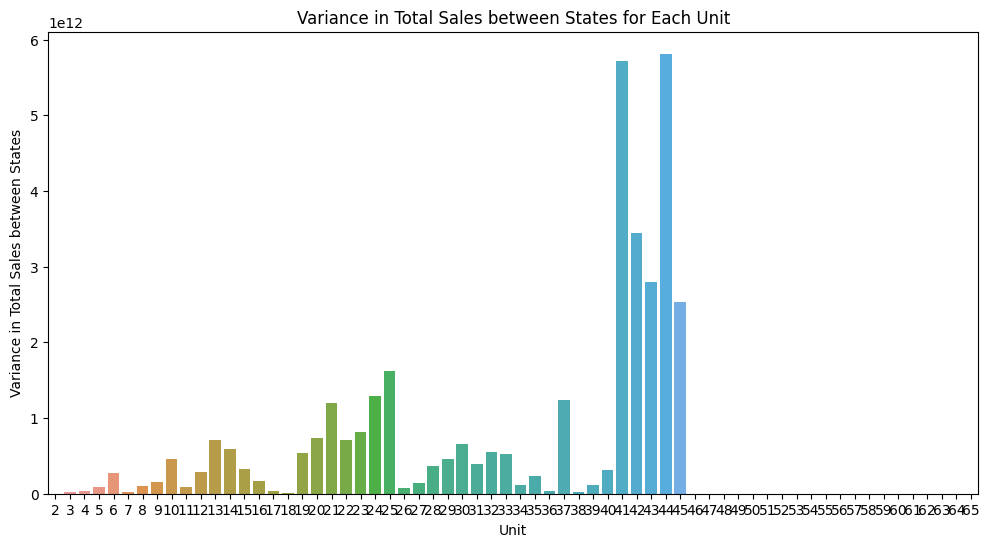

In [18]:

# Calculate the variance in total sales between states for each unit
grouped_by_unit_state = df.groupby(['Unit', 'State'])['Sales'].sum().reset_index()
unit_state_var = grouped_by_unit_state.groupby('Unit')['Sales'].var().reset_index()

# Plotting using seaborn with variance as error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Unit', y='Sales', data=unit_state_var, ci='sd')

# Setting labels and title
plt.xlabel('Unit')
plt.ylabel('Variance in Total Sales between States')
plt.title('Variance in Total Sales between States for Each Unit')

# Display the plot
plt.show()


<ipython-input-19-b833b750c698>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Unit', y='Sales', data=unit_state_var, ci='sd')


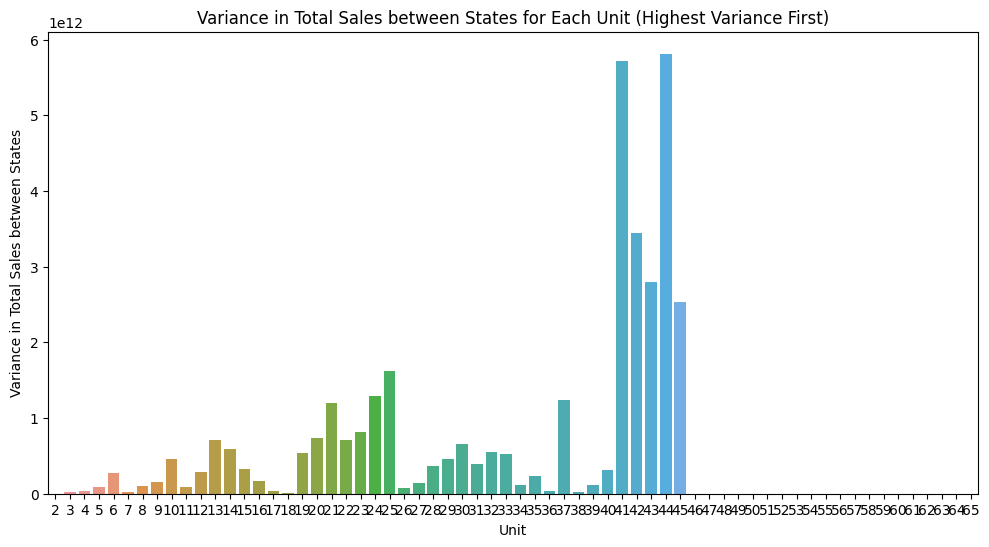

In [19]:
# Calculate the variance in total sales between states for each unit
grouped_by_unit_state = df.groupby(['Unit', 'State'])['Sales'].sum().reset_index()
unit_state_var = grouped_by_unit_state.groupby('Unit')['Sales'].var().reset_index()

# Sort units based on variance in descending order
unit_state_var = unit_state_var.sort_values(by='Sales', ascending=False)

# Plotting using seaborn with variance as error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Unit', y='Sales', data=unit_state_var, ci='sd')

# Setting labels and title
plt.xlabel('Unit')
plt.ylabel('Variance in Total Sales between States')
plt.title('Variance in Total Sales between States for Each Unit (Highest Variance First)')

# Display the plot
plt.show()


In [20]:
# Assuming df is your DataFrame
unique_units_sorted = sorted(df['Unit'].unique())

# Display the sorted list of unique units
print(unique_units_sorted)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


In [21]:
# Assuming df is your DataFrame

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Sales', index='Unit', columns='State', aggfunc='sum', fill_value=0)

# Display the pivot table
print(pivot_table)

State   NSW       NT     QLD   SA      TAS      VIC       WA
Unit                                                        
2         0   225000       0    0   185000        0   240000
3         0   510000  217500    0   547500        0   525000
4         0   490000  260000    0   640000        0   710000
5         0  1237500  600000    0  1037500        0  1262500
6         0  1620000  615000    0  1560000        0  1755000
...     ...      ...     ...  ...      ...      ...      ...
61        0        0       0    0        0  1372500        0
62        0        0       0    0        0  1550000        0
63        0        0       0    0        0  2047500        0
64        0        0       0    0        0  2080000        0
65        0        0       0    0        0  1787500        0

[64 rows x 7 columns]


In [22]:
# Keep rows where only one state has sales greater than 0
pivot_table = pivot_table[(pivot_table > 0).sum(axis=1) == 1]

# Display the updated pivot table
print(pivot_table)

State   NSW   NT   QLD   SA   TAS      VIC   WA
Unit                                           
46        0    0     0    0     0  2530000    0
47        0    0     0    0     0  2585000    0
48        0    0     0    0     0  2160000    0
49        0    0     0    0     0  2572500    0
50        0    0     0    0     0  3375000    0
51        0    0     0    0     0  1147500    0
52        0    0     0    0     0  1300000    0
53        0    0     0    0     0  1192500    0
54        0    0     0    0     0  1215000    0
55        0    0     0    0     0  1512500    0
56        0    0     0    0     0  2100000    0
57        0    0     0    0     0  1567500    0
58        0    0     0    0     0   725000    0
59        0    0     0    0     0  1327500    0
60        0    0     0    0     0  1050000    0
61        0    0     0    0     0  1372500    0
62        0    0     0    0     0  1550000    0
63        0    0     0    0     0  2047500    0
64        0    0     0    0     0  20800

In [23]:
# Assuming pivot_table is your DataFrame

# Keep rows where only two states have sales greater than 0
pivot_table = pivot_table[(pivot_table > 0).sum(axis=1) == 2]

# Display the updated pivot table
print(pivot_table)


Empty DataFrame
Columns: [ NSW,  NT,  QLD,  SA,  TAS,  VIC,  WA]
Index: []


In [24]:
# Assuming df is your DataFrame
df_no_zeros = df[(df != 0).all(axis=1)]

# Display the resulting DataFrame
print(df_no_zeros)


           Date        Time State     Group  Unit  Sales Week    Month Quarter
0    2020-10-01     Morning    WA      Kids     8  20000   39  2020-10  2020Q4
1    2020-10-01     Morning    WA       Men     8  20000   39  2020-10  2020Q4
2    2020-10-01     Morning    WA     Women     4  10000   39  2020-10  2020Q4
3    2020-10-01     Morning    WA   Seniors    15  37500   39  2020-10  2020Q4
4    2020-10-01   Afternoon    WA      Kids     3   7500   39  2020-10  2020Q4
...         ...         ...   ...       ...   ...    ...  ...      ...     ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000   52  2020-12  2020Q4
7556 2020-12-30     Evening   TAS      Kids    15  37500   52  2020-12  2020Q4
7557 2020-12-30     Evening   TAS       Men    15  37500   52  2020-12  2020Q4
7558 2020-12-30     Evening   TAS     Women    11  27500   52  2020-12  2020Q4
7559 2020-12-30     Evening   TAS   Seniors    13  32500   52  2020-12  2020Q4

[7560 rows x 9 columns]


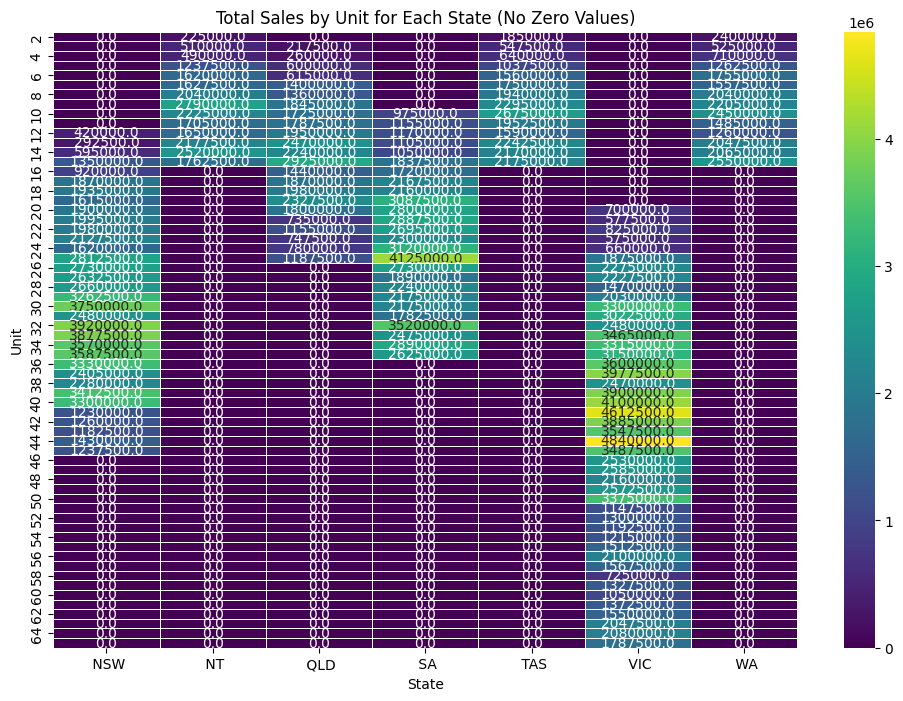

In [25]:
# Assuming df_no_zeros is your DataFrame without zero values
pivot_table_no_zeros = pd.pivot_table(df_no_zeros, values='Sales', index='Unit', columns='State', aggfunc='sum', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_no_zeros, cmap='viridis', annot=True, fmt='.1f', linewidths=.5)
plt.title('Total Sales by Unit for Each State (No Zero Values)')
plt.xlabel('State')
plt.ylabel('Unit')
plt.show()

<Figure size 1400x800 with 0 Axes>

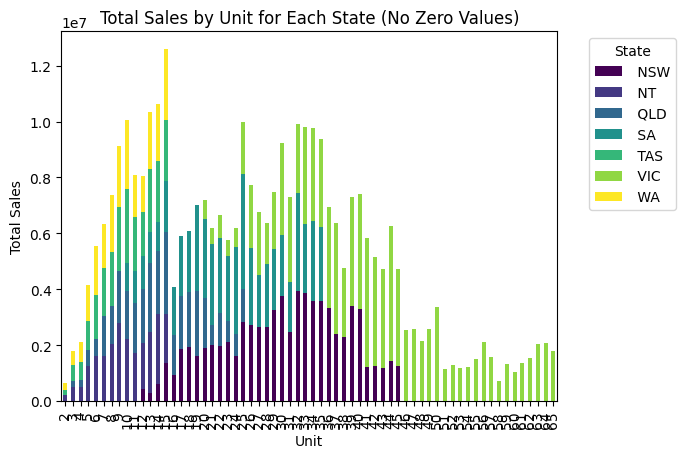

In [26]:
# Create a bar plot using seaborn
plt.figure(figsize=(14, 8))
pivot_table_no_zeros.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Sales by Unit for Each State (No Zero Values)')
plt.xlabel('Unit')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

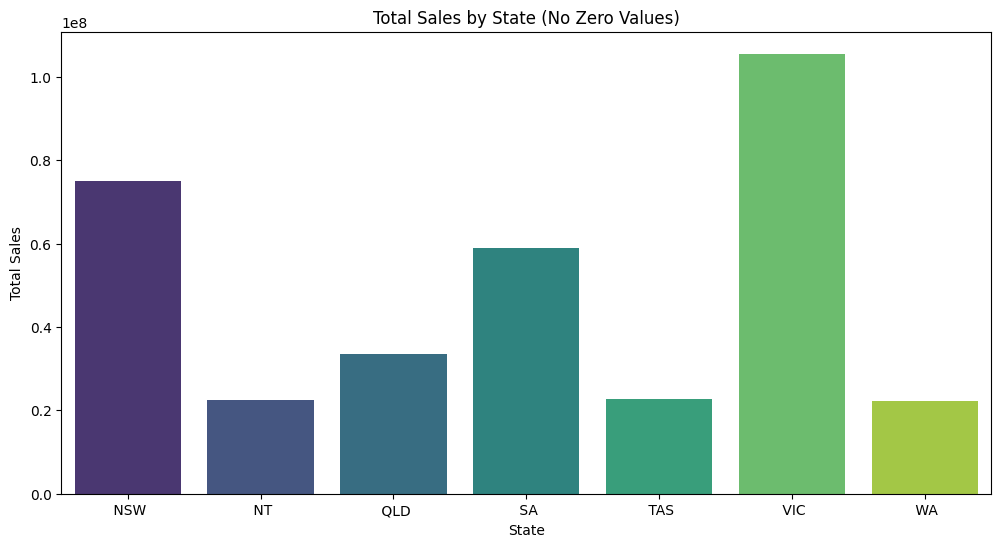

In [27]:
# Assuming df_no_zeros is your DataFrame without zero values
pivot_table_no_zeros = pd.pivot_table(df_no_zeros, values='Sales', index='Unit', columns='State', aggfunc='sum', fill_value=0)

# Sum the sales across all units for each state
total_sales_by_state = pivot_table_no_zeros.sum(axis=0)

# Create a bar plot using seaborn for total sales by state
plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_state.index, y=total_sales_by_state.values, palette='viridis')
plt.title('Total Sales by State (No Zero Values)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()